
# Project: Investigate a Dataset : No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have chosen the No-show Appointments Dataset. The dataset has various features like age, gender, scholarship (medical insurance), neighbourhood and other columns such as whether a patient is alcoholic or diabetic, has hypertension or is handicapped.
The motive of my data analysis to determine what features will be helpful in predicting whether a patient will show for his/her appointment. An important thing is that in column No-show, a 'Yes' means that the patient did not show up for his/her appointment and a 'No' means that patient showed up for his/her appointment 
The following are the questions that came to my mind when I studied the dataset
1. Does having Scholarship result in more number of patients showing up for their appointment?
2. Is the age of patient helpful in determing whether a patient will show up for their appointment?
3. Does the gender of a patient within an age group help in determinig whether a patient will show up for their appointment?


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [37]:
data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [39]:
# Get the number of rows and columns of the dataset.
data.shape

(110527, 14)

There are 110527 samples (rows) and 14 columns in the dataset

In [40]:
# Find the number of duplicate rows in the dataset.
sum(data.duplicated())

0

There are no duplicate rows in the dataset.

In [41]:
# Check whether there any missing values in the dataset.
data.isnull().sum().sum()

0

There are no missing values in the dataset

In [42]:
# Get the data types of all the columns and note any changes that need to be made.
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Data types of all the columns.

### Data Cleaning

First step is to convert all columns to lowercase. Then substitute hyphen "-" in the no-show column with an underscore. To make the process easier and to avoid using loops we will be using lambda function. Then confirm that the command has worked properly

In [43]:
# Change all the column names to lowercase and also rename the column 'no-show' to 'no_show' using lambda funtion.
data.rename(columns=lambda col: col.strip().lower().replace("-", "_"), inplace=True)
data.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Second step will be to drop unwanted columns: patientid and appointmentid

In [44]:
# Drop unwanted column names using Pandas drop().
data.drop(['patientid','appointmentid'],axis=1,inplace=True)
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


As we can see from the command data.dtypes, the data type of columns scheduledday and appointmentday are object(string) and the format of the data is also wrong in both the columns. We first have to convert them to datetime data type. we can also remove the time stamp to make the data easier to read. To remove the time stamp we will specify the format as Y-M-D. But using datetime alone will not remove the timestamp. For this we will use strftime() function.



In [45]:
# Convert the string data type to date using Pandas datetime().
data['scheduledday'] = pd.to_datetime(data['scheduledday'],format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
data['appointmentday'] = pd.to_datetime(data['appointmentday'],format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

We can derive a new column from the appointmentday column as year. This will make it easier to plot the data afterwards. Then confirm whether the commands have executed without any errors.

In [46]:
# Create a new column year.
data['year']=pd.DatetimeIndex(data['appointmentday']).year
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016


Now I will divide the age into four groups using the 25%, 50% and 75%. The groups will be kid,yound,middle_age and old. I will use the cut() function in pandas

In [47]:
# View the min, 25%, 50%, 75%, max age values with Pandas describe.
data['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [48]:
# Define bin eddges that will be used to "cut" the data into groups.
bin_edges=[-1,18,37,55,115]
# Define labels for the four age groups.
bin_names=['kid','young','middle_age','old']

In [49]:
# Create age_group column.
data['age_group']=pd.cut(data['age'],bin_edges,labels=bin_names)
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,old
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,old
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,old
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,kid
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,old


I will now save the data into a csv file

In [50]:
# Save the cleaned data in a csv file.
data.to_csv('appointment1.csv',index=False)
data=pd.read_csv('appointment1.csv')
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,old
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,old
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,old
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,kid
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,old


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Does having Scholarship result in more number of patients showing up for their appointment?
In this dataset I am assuming that 1 means yes and 0 means no

Since the count of having a scholarship and not having scholarship is not same, we will plot the ratio of the count each value of no_show to the mean of the total count. For this I will use groupby() function to get the count of each value in a column. Since all the columns will give the same value, we can use any random column to get the single column desired result. In this case I have used age column.
I am also keeping in mind that 'NO' in no_show column means that the patients showed up for their appointment.

In [51]:
# Get the mean of the total count of each value of no_show column by using groupby().
sls_totals = data.groupby('no_show').mean()['age']
sls_totals

no_show
No     37.790064
Yes    34.317667
Name: age, dtype: float64

In [52]:
# Get the count of the scholarship column using the groupby().
sls_count=data.groupby(['no_show','scholarship'])['age'].count()
sls_count

no_show  scholarship
No       0              79925
         1               8283
Yes      0              19741
         1               2578
Name: age, dtype: int64

In [53]:
# Calculate the ratio for 'No' value in the no_show column.
yes_ratio = sls_count['No'] / sls_totals['No']
yes_ratio

scholarship
0    2114.973903
1     219.184596
Name: age, dtype: float64

In [54]:
# Calculate the ratio for 'Yes' value in the no_show column.
no_ratio = sls_count['Yes'] / sls_totals['Yes']
no_ratio

scholarship
0    575.243074
1     75.121658
Name: age, dtype: float64

I will set the x axis/index as the length of any of the ratio. 

In [55]:
# Define index for x axis values.
index = np.arange(len(yes_ratio))
width = 0.40

I am using bar graph to show my results.

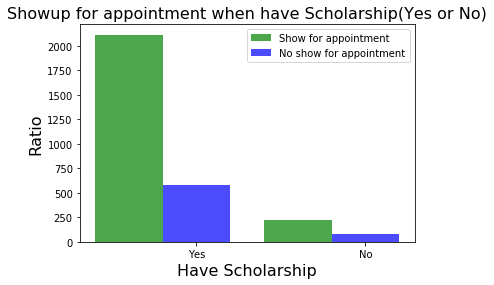

In [56]:
# Create a bar chart with proper labels.
yes_plot = plt.bar(index, yes_ratio, width, color='g', alpha=.7, label='Show for appointment');
no_plot = plt.bar(index + width, no_ratio, width, color='b', alpha=.7, label='No show for appointment');
plt.ylabel('Ratio',fontsize=16)
plt.xlabel('Have Scholarship',fontsize=16)
plt.title('Showup for appointment when have Scholarship(Yes or No)',fontsize=16)
locations = index + width
labels = ['Yes','No']
plt.xticks(locations, labels)
plt.legend();

As we can see from the bar graph that more patients tend to show up for their appointment when they have a scholarship.

### Research Question 2 Is the age of patient helpful in determing whether a patient will show up for their appointment?

I am going to plot pie chart for this question so that it is easier to visualise the comprehend the data. I will need to plot two pie charts, one for patients not showing up for appointments and one for when patients show up for appointments. I am using two plots because it will be easy to read the graphs.

In [57]:
data.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,year,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,old
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,old
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,old
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,kid
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,old


First I am going to seperate the Dataframe into two Series for Show and No show respectively. Then I am going to apply groupby() on the column age_group. This will give the count for each age group respectively.

In [58]:
# Get the count of each age_group for the value 'Yes' in no_show column using groupby().
no_show=data.query('no_show=="Yes"').groupby('age_group')['age'].count()
no_show

age_group
kid           6347
middle_age    5255
old           4303
young         6414
Name: age, dtype: int64

In [59]:
# Get the count of each age_group for the value 'Yes' in no_show column using groupby().
yes_show=data.query('no_show=="No"').groupby('age_group')['age'].count()
yes_show

age_group
kid           22519
middle_age    21651
old           23201
young         20836
Name: age, dtype: int64

In [60]:
# Define labels for the pie chart.
label=['kid','middle_age','old','young']

Now I will plot the graphs. 
the parameter autopct calculates the percentage of each sector of the pie chart.

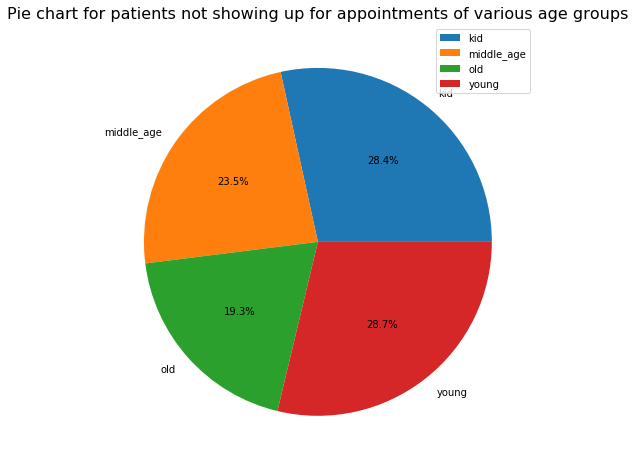

In [61]:
# Create a pie chart with proper labels.
plt.figure(figsize=(8,8))
plt.pie(no_show,labels=label,autopct='%1.1f%%');
plt.legend();
plt.title('Pie chart for patients not showing up for appointments of various age groups',fontsize=16);

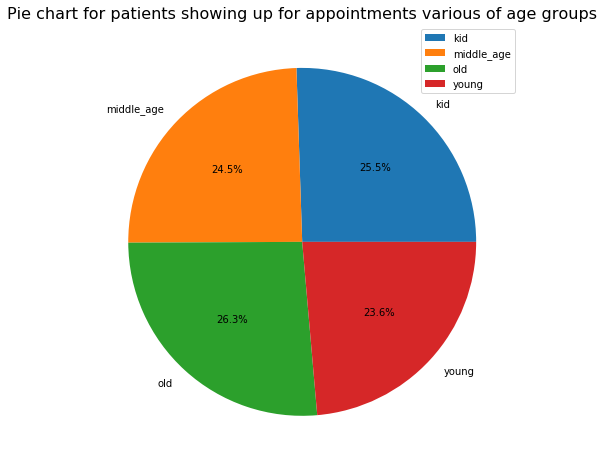

In [62]:
# Create a pie chart with proper labels.
plt.figure(figsize=(8,8))
plt.pie(yes_show,labels=label,autopct='%1.1f%%');
plt.legend();
plt.title('Pie chart for patients showing up for appointments various of age groups',fontsize=16);

From above pie charts we can conclude two things:
1. Youngsters are the age group that do not show up for appointments the most.
2. The old age group is the one that shows up for appointments the most.

### Research Question 3 Does the gender of a patient within an age group help in determinig whether a patient will show up for their appointment?

First I will get the data required for this analysis into a Series. Note that now the division criteria has increased to two columns instead of one.

In [63]:
# Get the count of the gender column using groupby().
gender_data=data.groupby(['no_show','age_group','gender'])['age'].count()
gender_data

no_show  age_group   gender
No       kid         F         11644
                     M         10875
         middle_age  F         14867
                     M          6784
         old         F         15580
                     M          7621
         young       F         15154
                     M          5682
Yes      kid         F          3310
                     M          3037
         middle_age  F          3637
                     M          1618
         old         F          2979
                     M          1324
         young       F          4668
                     M          1746
Name: age, dtype: int64

Since the count of both the genders are not equal, we will divide them by the mean of their total count and then calculate the ratios for both show and no show respectively.

In [64]:
# Calculate the mean of the total count using groupby().
gen_total=data.groupby(['no_show','age_group'])['age'].mean()
gen_total

no_show  age_group 
No       kid            7.653315
         middle_age    46.761166
         old           67.225852
         young         28.264014
Yes      kid            8.696234
         middle_age    46.300666
         old           67.202417
         young         27.792173
Name: age, dtype: float64

In [65]:
# Calculate the ratio for 'No' value in no_show column.
gen_ratio_yes=gender_data['No']/gen_total['No']
gen_ratio_yes

age_group   gender
kid         F         1521.432220
            M         1420.952885
middle_age  F          317.934760
            M          145.077649
old         F          231.756080
            M          113.364126
young       F          536.158802
            M          201.033015
Name: age, dtype: float64

In [66]:
# Calculate the ratio for 'Yes' value in no_show column.
gen_ratio_no=gender_data['Yes']/gen_total['Yes']
gen_ratio_no

age_group   gender
kid         F         380.624513
            M         349.231615
middle_age  F          78.551786
            M          34.945502
old         F          44.328763
            M          19.701672
young       F         167.960956
            M          62.823442
Name: age, dtype: float64

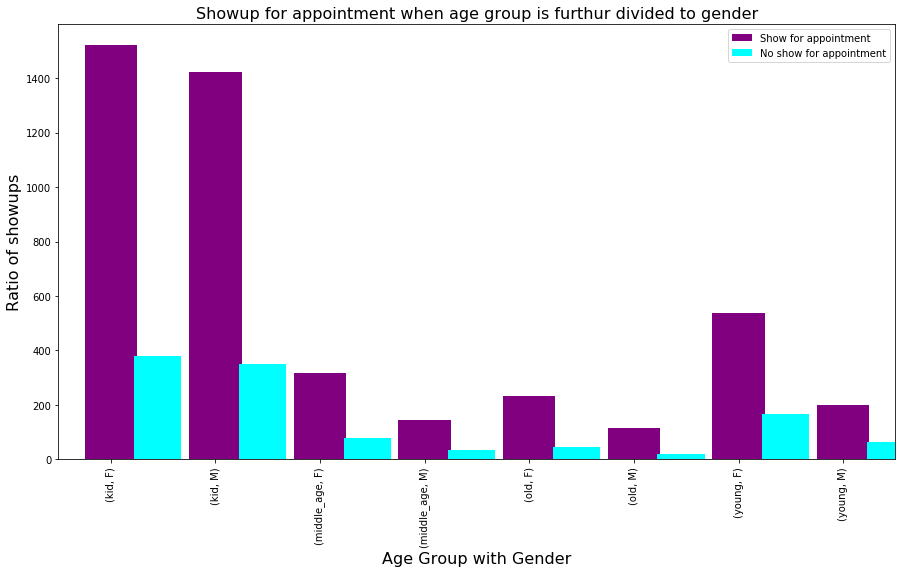

In [67]:
# Plot bar chart with correct lables.
plt.figure(figsize=(15,8))
ind = np.arange(len(gen_ratio_yes))
width = 0.45
gen_yes_plot = gen_ratio_yes.plot(kind='bar', color='purple', label='Show for appointment')
gen_no_plot = plt.bar(ind + width, gen_ratio_no, width, color='aqua', label='No show for appointment')
plt.ylabel('Ratio of showups',fontsize=16)
plt.xlabel('Age Group with Gender',fontsize=16)
plt.title('Showup for appointment when age group is furthur divided to gender',fontsize=16)

plt.legend();

We can see from the above graph that female patients tend to show up for their appointments more than the male patients of their respective age groups.

## Limitations

I faced the following limitations during the project:
1. Data type and format of the columns scheduledday	and appointmentday were incorrect, I had to change both in the dataset. After researching on the internet for sometime I found different ways to achieve both the thing but seperately. I used a lot of trial and error methods to come up with a command that will do both thing together.
2. I was trying to combine the columns of hipertension, diabetes, alcoholism and handcap to make a new column called aliments. I wanted to check whether having an ailment will increase the likelyhood of a patient showing up for his/her appointment. I tried a lot of methods but none of them gave desired results.

<a id='conclusions'></a>
## Conclusions

The data analysis process was to help us determine/identify the features that will help in predicting whether a patient shows up for his/her appointment. The following features are helpful
1. If a patient has a scholarship he/she is more likely to show up for his/her appointment than a patient who does not have a scholarship.
2. If a patient is a youngster i.e of the age group 19-37 then they are more likely to not show up for their appointment than the other age groups.
3. If a patient belongs to an older age group, then they are more likely to show up for their appointments.
4. If the age groups were furthur divided by gender, then female patients are more likely to show for appointments than the male patients of a particular group.

## Acknowledgement

https://stackoverflow.com
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html